In [7]:
# [RDKitの分子Molオブジェクトを扱う | 化学の新しいカタチ](https://future-chem.com/rdkit-mol/)
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw
import pubchempy as pcp

In [5]:
print('rdkit version: {}'.format(rdBase.rdkitVersion))

rdkit version: 2019.09.2


In [2]:
suppl = Chem.SDMolSupplier('./sdf/methyl-salicylate.sdf')
mols = [x for x in suppl if x is not None]
len(mols)

71

In [5]:
mols

In [4]:
Chem.SDMolSupplier('./sdf/methyl-salicylate.sdf')

In [38]:
for mol in mols[:5]:
    print(mol.GetProp('PRODUCT_NAME'))
    for a in mol.GetAtoms():
        if a.GetSymbol() == 'C' and str(a.GetHybridization()) == 'SP3':
            print('index for sp3 carbon: {}'.format(a.GetIdx()))
    print('###')


Methyl Acetylsalicylate
index for sp3 carbon: 9
index for sp3 carbon: 12
###
Methyl o-Anisate
index for sp3 carbon: 9
index for sp3 carbon: 11
###
Dimethyl 4-Acetoxyisophthalate
index for sp3 carbon: 12
index for sp3 carbon: 13
index for sp3 carbon: 16
###
Ethyl Acetylsalicylate
index for sp3 carbon: 10
index for sp3 carbon: 11
index for sp3 carbon: 13
###
(+)-Bicuculline
index for sp3 carbon: 2
index for sp3 carbon: 4
index for sp3 carbon: 5
index for sp3 carbon: 8
index for sp3 carbon: 10
index for sp3 carbon: 16
index for sp3 carbon: 25
###


In [44]:
# for i in mols[1].GetAtoms(): print(i.GetSymbol())
# for i in mols[1].GetAtoms(): print(str(i.GetHybridization()))
# for i in mols[1].GetAtoms(): print(i.GetIdx())
# for i in mols[1].GetPropNames(): print(i)

PRODUCT_NUMBER
PRODUCT_NAME
MOLECULAR_FORMULA
MOLECULAR_WEIGHT
CAS_NUMBER
MDL_NUMBER


In [41]:
for mol in mols[-3:]:
    print(mol.GetProp('PRODUCT_NAME'))
    for b in mol.GetBonds():
        if b.GetIsAromatic():
            print('bond between {}-{} is aromatic.'.format(b.GetBeginAtomIdx(), b.GetEndAtomIdx()))
    print('###')

2-Ethylhexyl Salicylate
bond between 3-4 is aromatic.
bond between 3-8 is aromatic.
bond between 4-5 is aromatic.
bond between 5-6 is aromatic.
bond between 6-7 is aromatic.
bond between 7-8 is aromatic.
###
Propyl Salicylate
bond between 3-4 is aromatic.
bond between 3-8 is aromatic.
bond between 4-5 is aromatic.
bond between 5-6 is aromatic.
bond between 6-7 is aromatic.
bond between 7-8 is aromatic.
###
3,3,5-Trimethylcyclohexyl Salicylate (cis- and trans- mixture)
bond between 0-1 is aromatic.
bond between 1-2 is aromatic.
bond between 2-3 is aromatic.
bond between 3-4 is aromatic.
bond between 4-5 is aromatic.
bond between 0-5 is aromatic.
###


In [45]:
for p in mols[0].GetPropNames():
    print('{}: {}'.format(p, mols[0].GetProp(p)))

PRODUCT_NUMBER: A0114
PRODUCT_NAME: Methyl Acetylsalicylate
MOLECULAR_FORMULA: C10H10O4
MOLECULAR_WEIGHT: 194.19
CAS_NUMBER: 580-02-9
MDL_NUMBER: MFCD00014978


In [3]:
# draw one molecule
print(type(Draw.MolToImage(mols[0])))
print(type(mols[0]))
Draw.MolToImage(mols[0]).show()

<class 'PIL.Image.Image'>
<class 'rdkit.Chem.rdchem.Mol'>


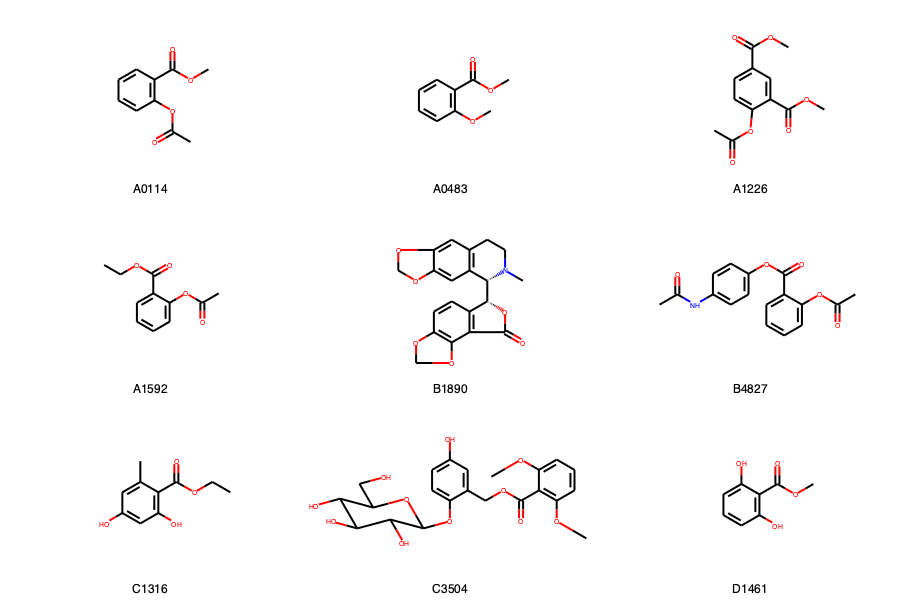

In [6]:
# draw multiple molecules
Draw.MolsToGridImage(mols[:9], molsPerRow=3, subImgSize=(300, 200), legends=[x.GetProp('PRODUCT_NUMBER') for x in mols[:9]])

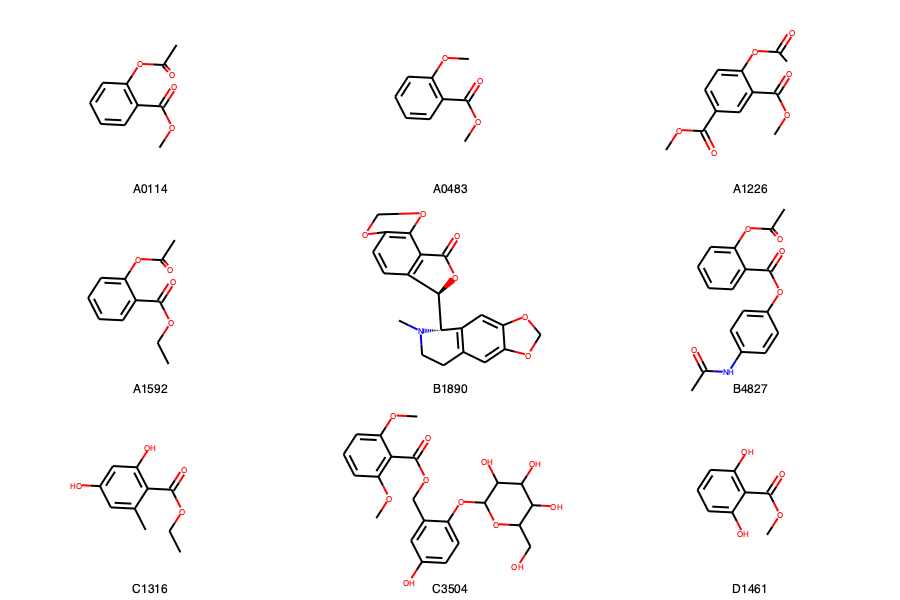

In [9]:
# create template, pubchempy is needed
tmp = pcp.get_compounds('salicylic acid', 'name')
tmp = tmp[0]
tmp_smiles = tmp.canonical_smiles
template = Chem.MolFromSmiles(tmp_smiles)
AllChem.Compute2DCoords(template)
# re-calculate 2D-coordinations based on template
for mol in mols:
    if mol.HasSubstructMatch(template):
        AllChem.GenerateDepictionMatching2DStructure(mol, template)

# draw again by Grid Image
Draw.MolsToGridImage(mols[:9], molsPerRow=3, subImgSize=(300, 200), legends=[x.GetProp('PRODUCT_NUMBER') for x in mols[:9]])

6


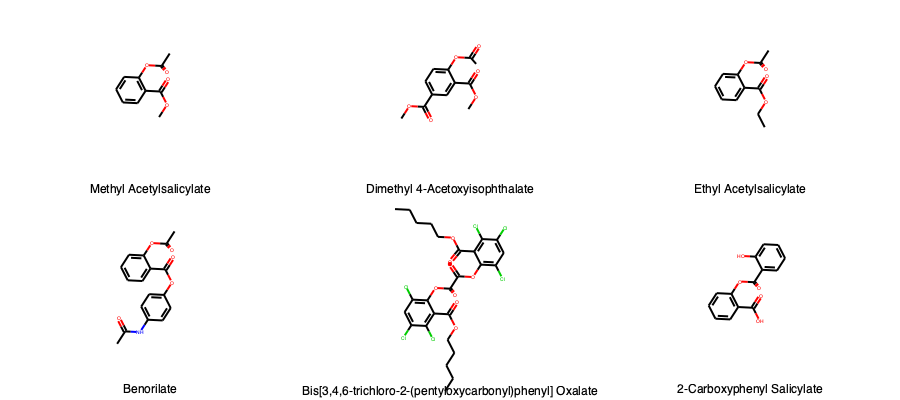

In [10]:
# create template (aspirin)
aspirin = pcp.get_compounds('aspirin', 'name')
aspirin = aspirin[0]
aspirin_sm = aspirin.canonical_smiles
aspirin_mol = Chem.MolFromSmiles(aspirin_sm)
AllChem.Compute2DCoords(aspirin_mol)

# draw molecule which has substructure
match = []
for mol in mols:
    if mol.HasSubstructMatch(aspirin_mol):
        match.append(mol)
print(len(match))
Draw.MolsToGridImage(match, molsPerRow=3, subImgSize=(300, 200), legends=[x.GetProp('PRODUCT_NAME') for x in match])

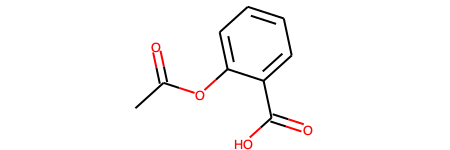

In [18]:
aspirin_mol